## Regression: Boston Housing Data
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

** Dataset Information: **

506 Boston housing information including value of houses

** Attribute Information: (13 features and 1 class)**

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
                 
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
                 
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                 
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

** Objective of this project **

predict value of house (MEDV) based on the other features

## Data

In [1]:
options(warn=-1)
# Load Data
df  <- read.csv('housing.data',sep='',header=FALSE)
colnames(df) = c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                  'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'label')

In [2]:
# Inspect Data
head(df,3)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
dim(df)

[1] 506  14

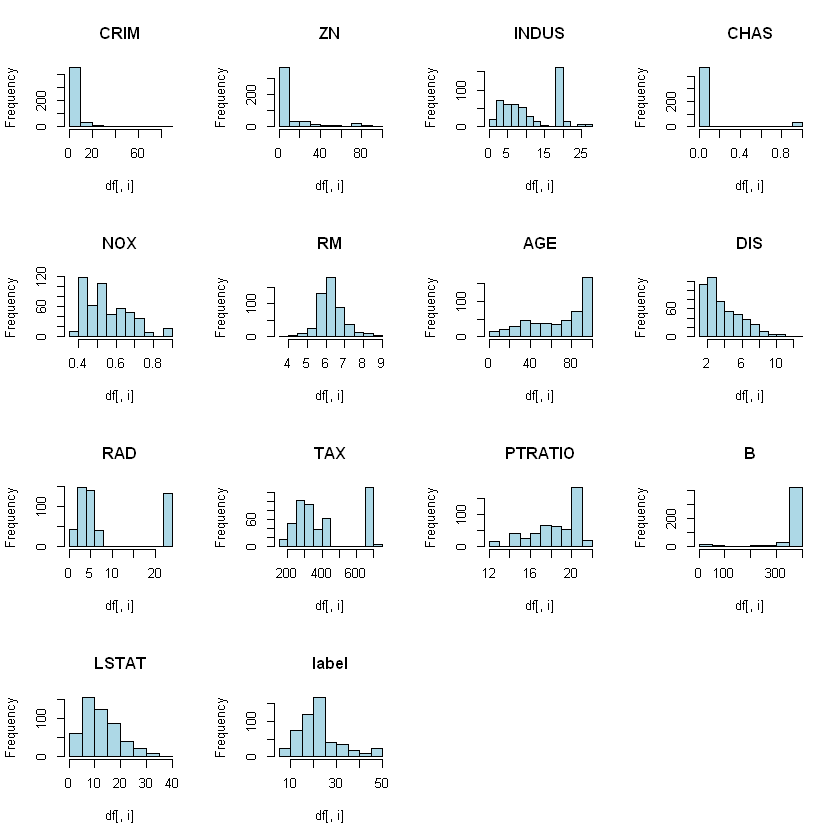

In [4]:
par(mfrow=c(4,4))
for(i in 1:14) {
    hist(df[,i], main=names(df)[i], col = 'lightblue')
}

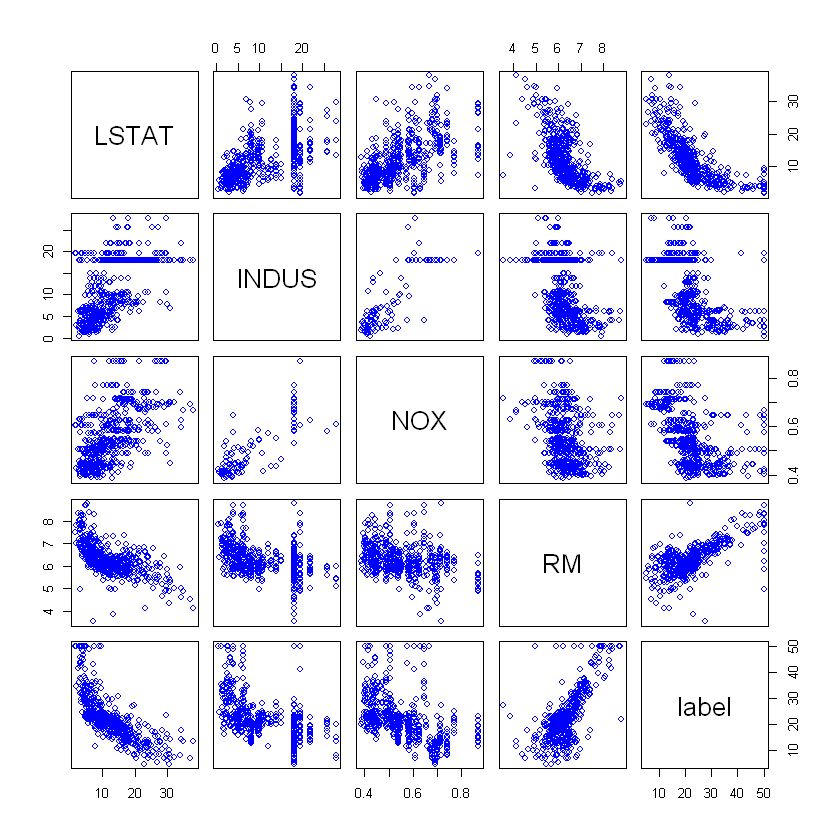

In [5]:
pairs(df[c('LSTAT', 'INDUS', 'NOX', 'RM', 'label')], col = 'blue')

corrplot 0.84 loaded


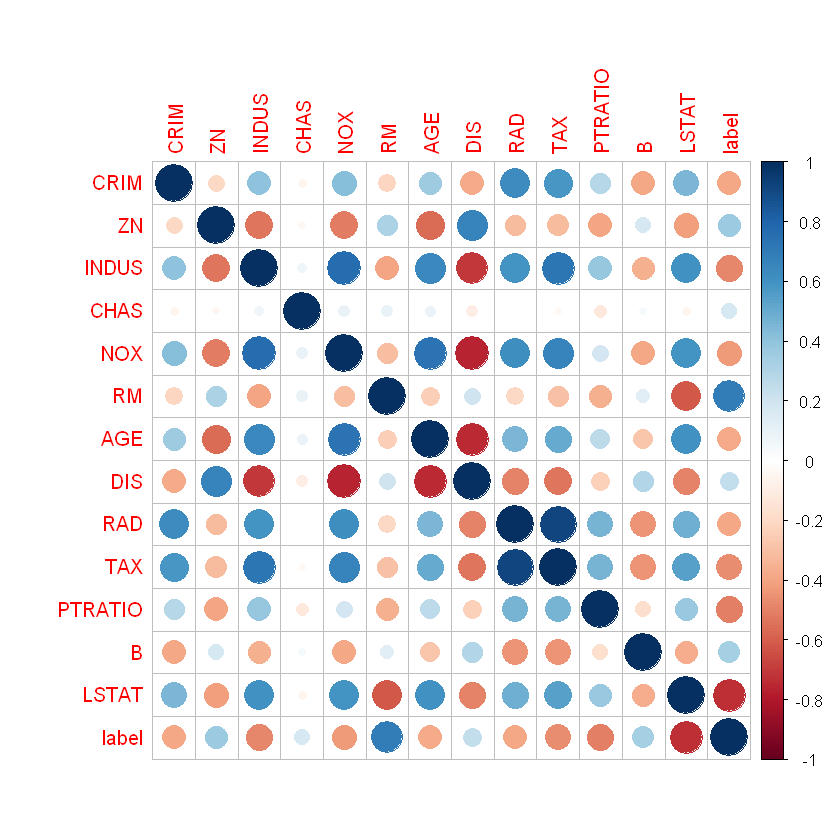

In [6]:
library(corrplot)
corrplot(cor(df), method="circle")

In [7]:
str(df)

'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ label  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [8]:
summary(df)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [9]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [10]:
library(caTools)
library(caret)
seed = 123 #random seed for reproducibility
set.seed(seed) 

Loading required package: lattice
Loading required package: ggplot2


** Scale features **

In [25]:
maxs <- apply(df, 2, max) 
mins <- apply(df, 2, min)
df_scaled <- as.data.frame(scale(df, center = mins, scale = maxs - mins))
summary(df_scaled)

      CRIM                    ZN                INDUS          
 Min.   :0.0000000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0008511307   1st Qu.:0.0000000   1st Qu.:0.1733871  
 Median :0.0028120753   Median :0.0000000   Median :0.3383431  
 Mean   :0.0405440983   Mean   :0.1136364   Mean   :0.3913775  
 3rd Qu.:0.0412584855   3rd Qu.:0.1250000   3rd Qu.:0.6466276  
 Max.   :1.0000000000   Max.   :1.0000000   Max.   :1.0000000  
      CHAS                 NOX                  RM           
 Min.   :0.00000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.00000000   1st Qu.:0.1316872   1st Qu.:0.4453918  
 Median :0.00000000   Median :0.3148148   Median :0.5072811  
 Mean   :0.06916996   Mean   :0.3491668   Mean   :0.5218690  
 3rd Qu.:0.00000000   3rd Qu.:0.4917695   3rd Qu.:0.5867982  
 Max.   :1.00000000   Max.   :1.0000000   Max.   :1.0000000  
      AGE                 DIS                  RAD           
 Min.   :0.0000000   Min.   :0.00000000   Min.   :0.0000

** Split Train Test Sets **

In [26]:
split = sample.split(df_scaled$label, SplitRatio = 0.80)
train_set = subset(df_scaled, split == TRUE)
test_set = subset(df_scaled, split == FALSE) 

## Neural Network

In [27]:
trControl <- trainControl(method='cv', number=5)
metric <- 'RMSE'

#### Random Forest

In [28]:
set.seed(seed)
fit.rf <- train(label~., data=train_set, method='rf', 
                metric=metric, trControl=trControl)
fit.rf

Random Forest 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 347, 347, 347, 347, 348 
Resampling results across tuning parameters:

  mtry  RMSE           Rsquared      MAE          
   2    0.08154435153  0.8672483471  0.05561576742
   7    0.07506598132  0.8757870533  0.05092539101
  13    0.07796217281  0.8640654974  0.05228838462

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 7.

In [29]:
# make predictions
predictions <- predict(fit.rf, test_set[-label_col])
# evaluate the model
postResample(pred = predictions, obs = test_set$label)

RMSE      Rsquared           MAE 
0.07130240646 0.82040343508 0.04724019636

#### Baseline Neural Network

In [30]:
metric <- 'RMSE'
set.seed(seed)
fit.nn <- train(label~., data=train_set, method='neuralnet', 
                metric=metric, trControl=trControl)
fit.nn

Neural Network 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 347, 347, 347, 347, 348 
Resampling results across tuning parameters:

  layer1  RMSE           Rsquared      MAE          
  1       0.09311454447  0.8046462568  0.06499250712
  3       0.08035357439  0.8528437760  0.05490970438
  5       0.07634792350  0.8689340320  0.05084158768

Tuning parameter 'layer2' was held constant at a value of 0
Tuning
 parameter 'layer3' was held constant at a value of 0
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were layer1 = 5, layer2 = 0 and layer3 = 0.

## Parameter Tuning

tuning parameters: http://topepo.github.io/caret/available-models.html

In [31]:
trControl <- trainControl(method='cv', number=5)
metric <- 'RMSE'

Neural Network 

434 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 347, 347, 347, 347, 348 
Resampling results across tuning parameters:

  layer2  layer3  RMSE           Rsquared      MAE          
  1       1       0.08406188504  0.8327117431  0.05414900527
  1       3       0.08006394390  0.8601520387  0.05292898591
  1       5       0.07390606838  0.8759961066  0.05174011245
  3       1       0.09143483340  0.8145574796  0.05297434392
  3       3       0.07895313743  0.8585183371  0.05329091588
  3       5       0.08618735623  0.8241529955  0.05368621878
  5       1       0.08824764128  0.8235857726  0.05366172564
  5       3       0.09476304388  0.8004502550  0.05547157161
  5       5       0.07980227085  0.8589994184  0.05300586698

Tuning parameter 'layer1' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were layer1 = 5, layer2 = 1 a

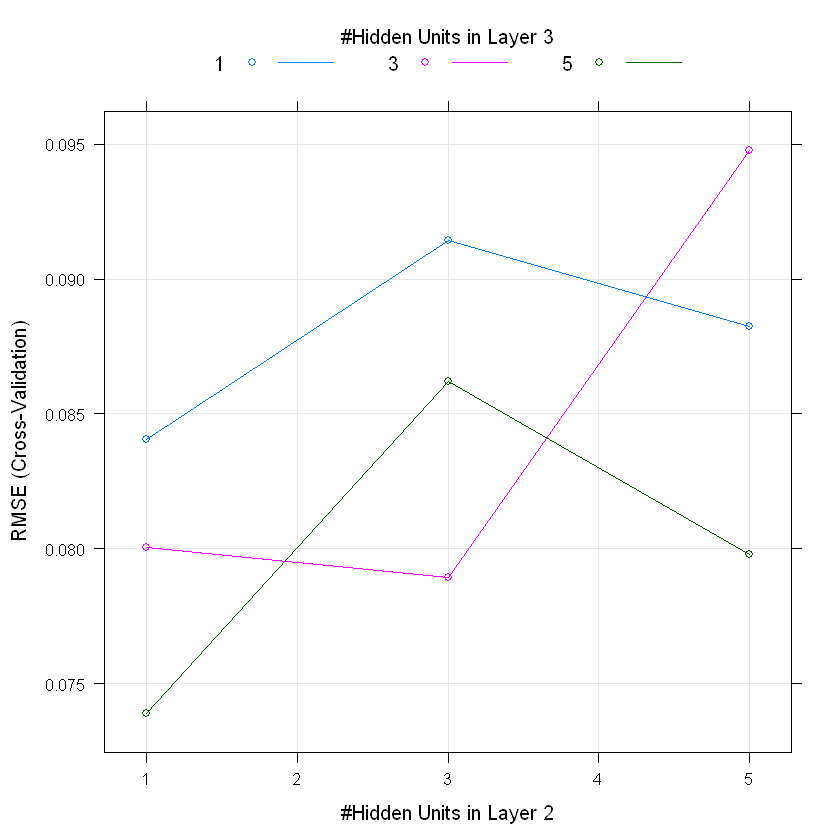

In [32]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(layer1 = 5,
                        layer2 = c(1,3,5),
                        layer3 = c(1,3,5))
gridSearch <- train(label~., data=train_set, method='neuralnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

In [ ]:
head(error.df)

In [ ]:
library(ggplot2)
ggplot(error.df,aes(x=test.r,y=true.predictions)) + geom_point() + stat_smooth()

In [ ]:
postResample(pred = predictions$net.result, obs = test_set$label)

In [ ]:
?neuralnet

## Final Model: 

In [33]:
library(neuralnet)
feat_col <- names(train_set)
formula <- as.formula(paste("label ~", 
                            paste(feat_col[!feat_col %in% "label"], 
                                  collapse = " + ")))
formula
set.seed(seed)
final.model <- neuralnet(formula,train_set,
                         hidden=c(5,1,5),linear.output=TRUE)
#print(final.model)

label ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + 
    TAX + PTRATIO + B + LSTAT

#### Save and load the final model

In [36]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [37]:
# load the model
final.model <- readRDS('final_model.rds')
#print(final.model)

#### Final Model Evaluation with Test set

In [45]:
# make predictions
predictions <- compute(final.model, test_set[-label_col])
# evaluate the model
postResample(pred = predictions$net.result*(max(df$label)-min(df$label))+min(df$label), 
             obs = test_set$label*(max(df$label)-min(df$label))+min(df$label))

RMSE     Rsquared          MAE 
3.0755126154 0.8390961183 2.3123993958

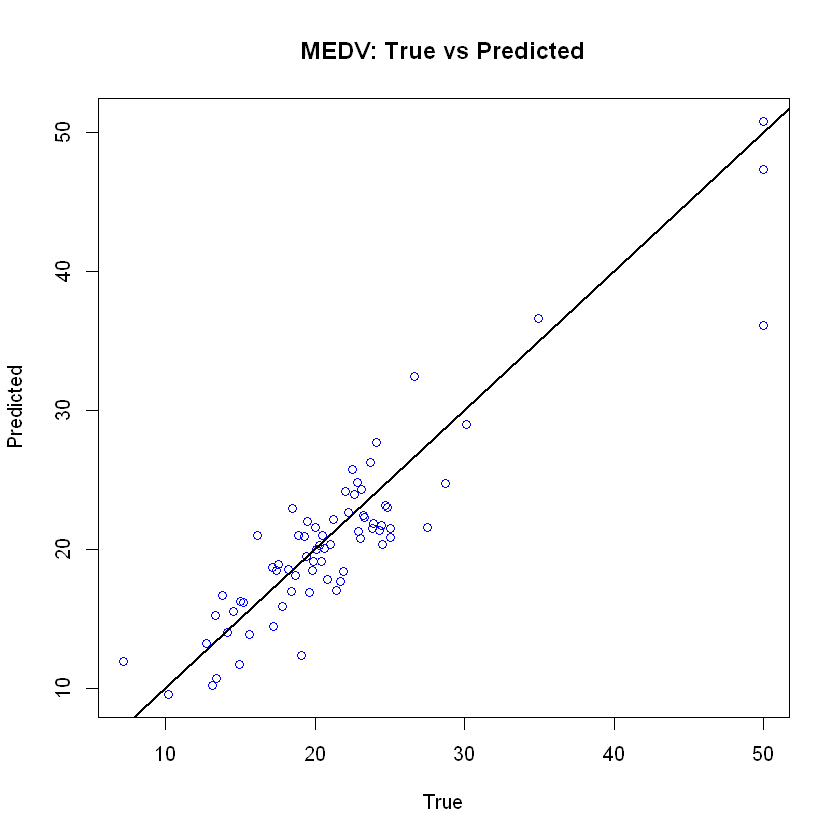

In [47]:
plot(x = test_set$label*(max(df$label)-min(df$label))+min(df$label), 
     y = predictions$net.result*(max(df$label)-min(df$label))+min(df$label), 
     col = 'blue', xlab = 'True', ylab = 'Predicted',  
     main = 'MEDV: True vs Predicted')
abline(0,1,lwd=2)

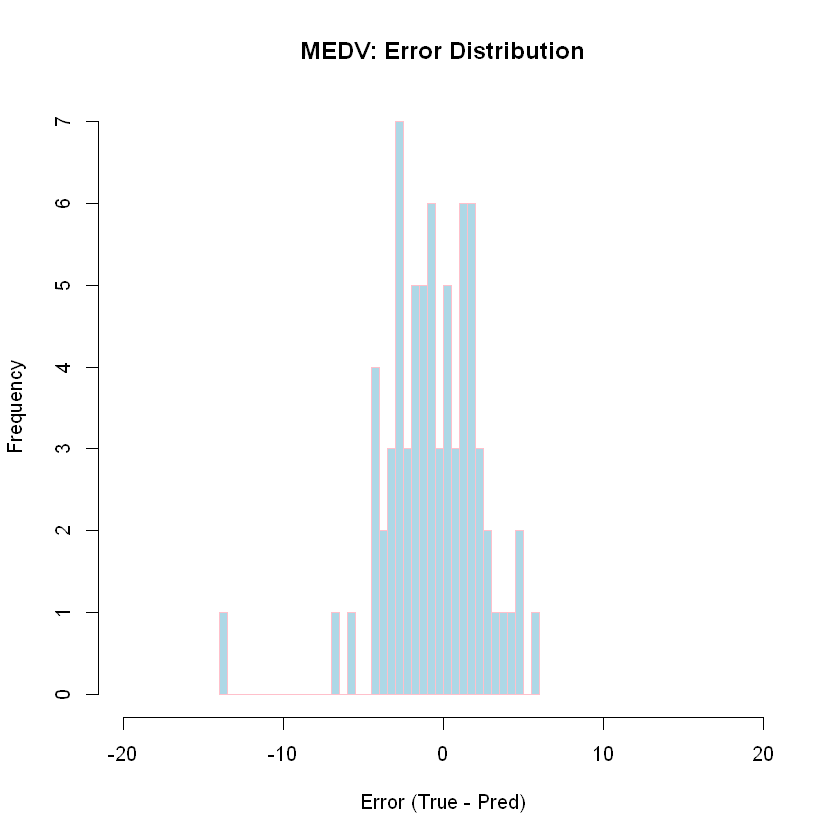

In [48]:
hist((predictions$net.result-test_set$label)*(max(df$label)-min(df$label)), 
     breaks = 50,
     col = 'lightblue', border = 'pink',
     xlab = 'Error (True - Pred)',
     main='MEDV: Error Distribution',
     xlim = c(-20, 20))

## Summary

- Best model: **NeuralNet** w/ 3 hidden layers and 5/5/3 neurons for each layer


- RMSE / R2 score of test set: ** 3.075 / 0.84 **